### 【 D1104_work_이준기    데이터 분석 및 시각화 】

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [78]:
DATA_FILE = '../Data/titanic_train.csv'

df = pd.read_csv(DATA_FILE)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
## 결측치 확인 및 삭제
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

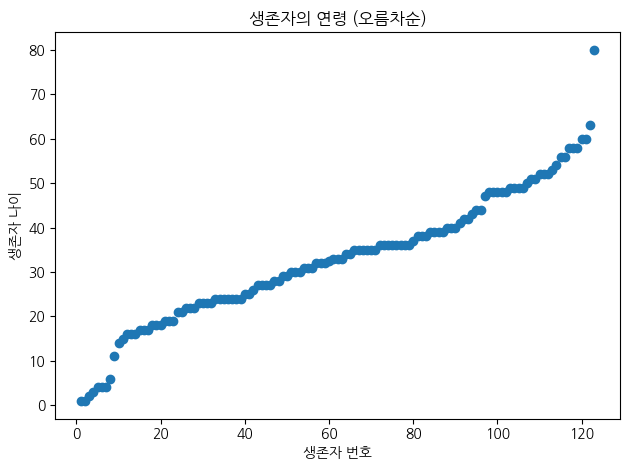

In [87]:
## - (1) 생존자의 연령 (선그래프 -> x축 인덱스(생존자 번호) , y축 생존자 나이)

# 생존자에 대한 조건문 생성
cond = df['Survived'] == 1
df_sur = df[cond]

# 좀 더 깔끔한 그래프를 위해 오름차순으로 정렬
df_sur = df_sur.sort_values('Age')

# 인덱스 번호 
df_sur.index = range(1, len(df_sur)+1)

# 그래프 생성
plt.scatter(df_sur.index, df_sur['Age'])
plt.title('생존자의 연령 (오름차순)')
plt.xlabel('생존자 번호')
plt.ylabel('생존자 나이')
plt.tight_layout()

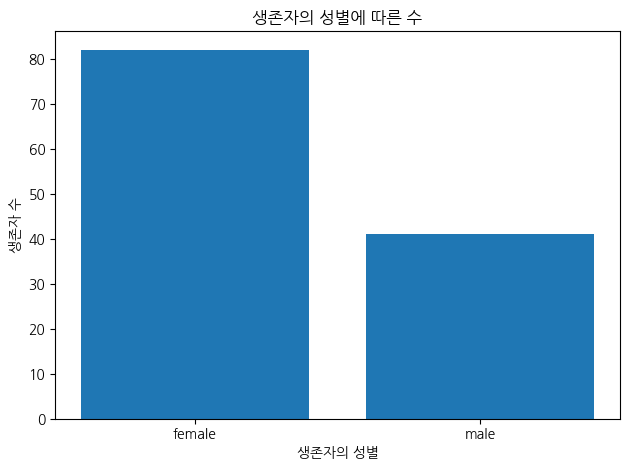

In [86]:
## - (2) 생존자의 성별 (막대 그래프 -> x축 성별, y축 생존자 수)

# 성별에 따른 값 카운트하기
sex_counts = df_sur['Sex'].value_counts()

# 막대그래프 생성
plt.bar(sex_counts.index, sex_counts.values)
plt.title('생존자의 성별에 따른 수')
plt.xlabel('생존자의 성별')
plt.ylabel('생존자 수')
plt.tight_layout()

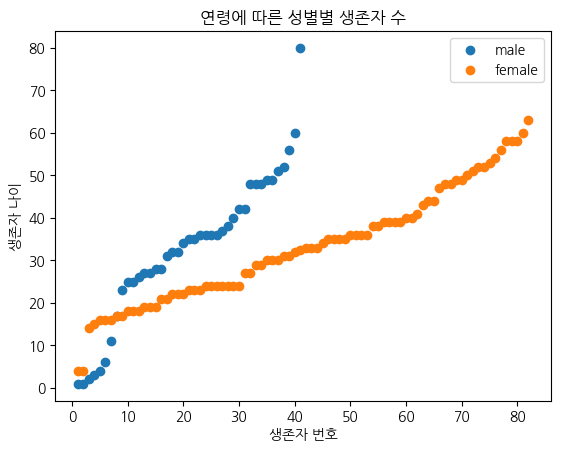

In [84]:
## - (3) 생존자들의 연령과 성별 분석 (x축 : 연령, y축 : 생존자 수 => 2개의 성별에 따른 그래프 하나에 나타내서 비교하기)

## 남성, 여성에 따른 생존자 분류
cond1 = (df_sur['Sex'] == 'male')
cond2 = (df_sur['Sex'] == 'female')

df_m = df_sur[cond1]
df_fm = df_sur[cond2]

## 인덱스 번호 구분
df_m.index = range(1, len(df_m)+1)
df_fm.index = range(1, len(df_fm)+1)

## 그래프 생성하기
plt.scatter(df_m.index, df_m['Age'])
plt.scatter(df_fm.index, df_fm['Age'])
plt.title('연령에 따른 성별별 생존자 수')
plt.xlabel('생존자 번호')
plt.ylabel('생존자 나이')
plt.legend(['male', 'female'])


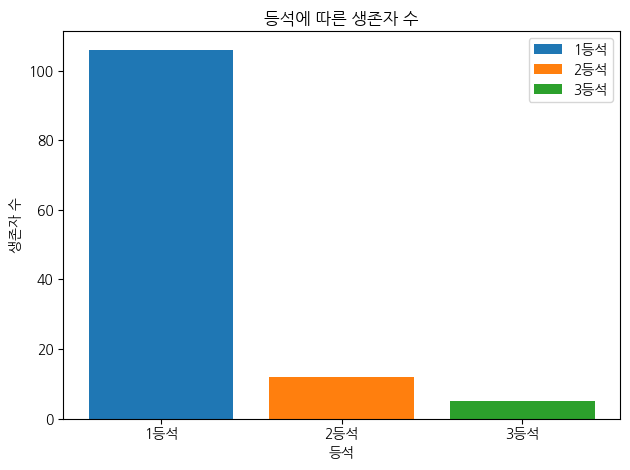

In [83]:
## - (4) 등석에 따른 생존자 분석 (막대 그래프 => x축 : 등석, y축 : 생존자 수)

## Pclass에 따른 오름차순 정리 (1~3 순으로)
df_class = df_sur.sort_values('Pclass')

## 인덱스 정리
df_class.index = range(1, len(df_class)+1)

## 그래프 출력 (등석에 따른 조건문이 True인 것의 개수를 세아려서 수 분석)
plt.bar('1등석', (df_class['Pclass']==1).sum())
plt.bar('2등석', (df_class['Pclass']==2).sum())
plt.bar('3등석', (df_class['Pclass']==3).sum())

## 그래프 출력 표시 값들
plt.title('등석에 따른 생존자 수')
plt.xlabel('등석')
plt.ylabel('생존자 수')
plt.legend(['1등석','2등석','3등석'])
plt.tight_layout()